# Import di librerie e Data-Set senza Missing Values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive') # importo da drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# importo il dataset senza Missing Values
df_no_ms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining 23 24/DS_senza_Miss_Val(dfm).csv')

# Normalizzazione del data set

In [6]:
df_no_ms.info() # stato del data set prima della normalizzazione

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  15000 non-null  object 
 1   duration_ms           15000 non-null  int64  
 2   explicit              15000 non-null  bool   
 3   popularity            15000 non-null  int64  
 4   artists               15000 non-null  object 
 5   album_name            15000 non-null  object 
 6   danceability          15000 non-null  float64
 7   energy                15000 non-null  float64
 8   key                   15000 non-null  int64  
 9   loudness              15000 non-null  float64
 10  mode                  15000 non-null  float64
 11  speechiness           15000 non-null  float64
 12  acousticness          15000 non-null  float64
 13  instrumentalness      15000 non-null  float64
 14  liveness              15000 non-null  float64
 15  valence            

In [7]:
# creo un sub-set del data-set che non contiene nè valori nominali nè booleani
num_dfm = df_no_ms.drop(['name', 'artists', 'album_name', 'genre', 'explicit'], axis=1)
num_dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration_ms           15000 non-null  int64  
 1   popularity            15000 non-null  int64  
 2   danceability          15000 non-null  float64
 3   energy                15000 non-null  float64
 4   key                   15000 non-null  int64  
 5   loudness              15000 non-null  float64
 6   mode                  15000 non-null  float64
 7   speechiness           15000 non-null  float64
 8   acousticness          15000 non-null  float64
 9   instrumentalness      15000 non-null  float64
 10  liveness              15000 non-null  float64
 11  valence               15000 non-null  float64
 12  tempo                 15000 non-null  float64
 13  features_duration_ms  15000 non-null  int64  
 14  time_signature        15000 non-null  float64
 15  n_beats            

In [8]:
num_dfm.head(10) # data-set di dati numerici senza gli attributi sopracitati

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,processing
0,241760,46,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,1.279305
1,444000,0,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,2.367412
2,333506,3,0.363,0.854,2,-7.445,0.0,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,3.700483
3,269800,23,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,1.279305
4,307651,25,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,4.067086
5,224266,32,0.642,0.972,5,-3.047,1.0,0.0967,0.001520,0.000024,0.3840,0.4210,118.035,224267,4.0,432.0,106.0,1.279305
6,225160,27,0.777,0.949,2,-2.488,1.0,0.0585,0.306000,0.000016,0.2990,0.8500,109.992,225160,4.0,411.0,103.0,3.700483
7,220626,64,0.741,0.816,4,-5.597,1.0,0.0797,0.021100,0.000000,0.0981,0.5740,146.075,220626,4.0,517.0,129.0,0.916010
8,116815,45,0.153,0.119,6,-25.160,0.0,0.0501,0.704000,0.913000,0.5430,0.0342,84.886,116815,4.0,162.0,40.0,1.170953
9,405800,21,0.311,0.729,4,-7.047,1.0,0.0346,0.000116,0.222000,0.2250,0.1190,141.326,405800,4.0,882.0,221.0,0.916010


In [9]:
#normalizzazione con min max di NumPy

min_vals = np.min(num_dfm, axis=0)
max_vals = np.max(num_dfm, axis=0)
num_norm_num_dfm = (num_dfm - min_vals) / (max_vals - min_vals)

In [10]:
num_norm_num_dfm.info() # data-set di dati numerici e normalizzato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration_ms           15000 non-null  float64
 1   popularity            15000 non-null  float64
 2   danceability          15000 non-null  float64
 3   energy                15000 non-null  float64
 4   key                   15000 non-null  float64
 5   loudness              15000 non-null  float64
 6   mode                  15000 non-null  float64
 7   speechiness           15000 non-null  float64
 8   acousticness          15000 non-null  float64
 9   instrumentalness      15000 non-null  float64
 10  liveness              15000 non-null  float64
 11  valence               15000 non-null  float64
 12  tempo                 15000 non-null  float64
 13  features_duration_ms  15000 non-null  float64
 14  time_signature        15000 non-null  float64
 15  n_beats            

In [11]:
num_norm_num_dfm.head()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,processing
0,0.056710,0.489362,0.704082,0.513,0.454545,0.702298,1.0,0.103834,0.303213,0.53600,0.282696,0.638191,0.644920,0.056710,0.8,0.077164,0.064977,0.160046
1,0.105897,0.000000,0.070408,0.196,0.090909,0.469376,0.0,0.085729,0.284137,0.93400,0.362173,0.033769,0.342800,0.105897,0.8,0.083968,0.071429,0.487891
2,0.079024,0.031915,0.370408,0.854,0.181818,0.798793,0.0,0.042279,0.000090,0.80000,0.263581,0.491457,0.528865,0.079024,0.8,0.088732,0.074654,0.889543
3,0.063530,0.244681,0.533673,0.585,0.454545,0.833678,1.0,0.081470,0.066667,0.00127,0.117706,0.386935,0.638839,0.063530,0.8,0.084241,0.071429,0.160046
4,0.072736,0.265957,0.656122,0.687,0.636364,0.724866,1.0,0.057401,0.000578,0.09690,0.300805,0.640201,0.652788,0.072736,0.8,0.099755,0.084332,1.000000


# Correlations

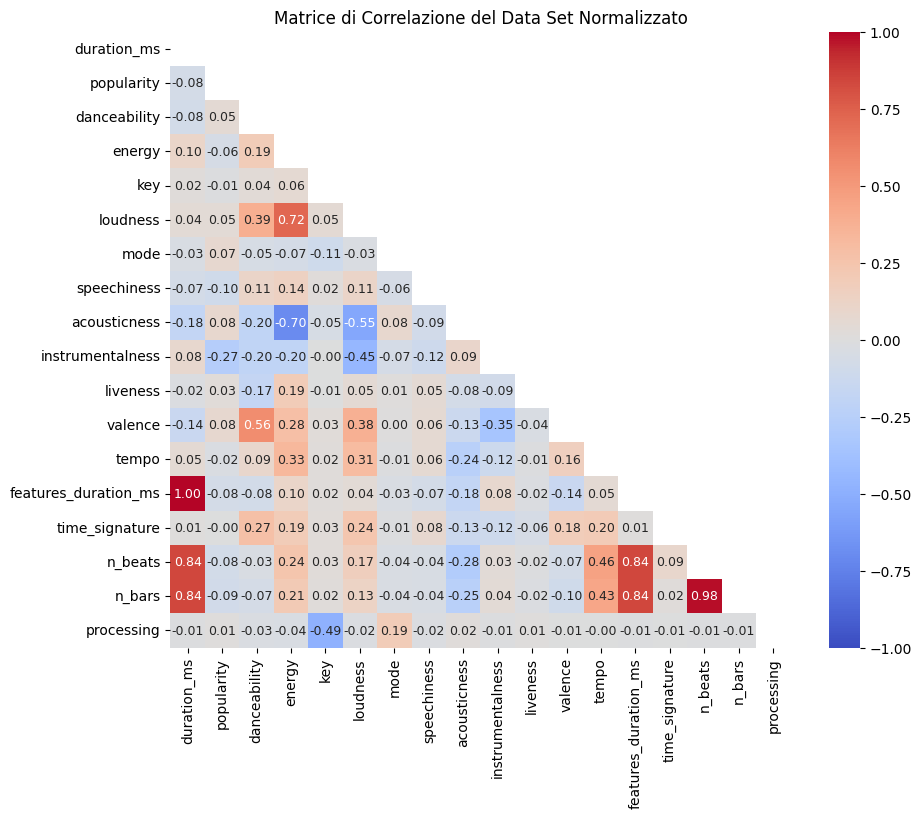

In [12]:
# Calcola la matrice di correlazione
correlation_matrix = num_norm_num_dfm.corr()

# Crea una maschera per la parte superiore della matrice (sopra la diagonale)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crea la heatmap utilizzando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={'size': 9})
plt.title('Matrice di Correlazione del Data Set Normalizzato')

plt.show()

Osservazioni sulla matrice di correlazione:
- gli attributi più positivamente correlati sono: 'features_duration_ms' e 'duration_ms' (1.0), 'n_beats' e 'n_bars' (0.84), 'features_duration_ms' e 'n_beats' (0.84), 'features_duration_ms' e 'n_bars' (0.84), 'loudness' e 'energy' (0.72), 'duration_ms' e 'n_bars' (0.84), 'valence' e 'danceability' (0.56), 'n_beats' e 'tempo' (0.46), 'n_bars' e 'tempo' (0.43)
- gli attributi più negativamente correlati sono: 'acousticness' e 'energy' (-0.70), 'acousticness' e 'loudness' (-0.55), 'key' e 'processing' (-0.49), 'instrumentalness' e 'loudness' (-0.49)
- da notare che processing è poco correlata con ogni attributo, tranne key (-0.49)
- gli attributi che hanno correlazioni con più altri attributi sono: 'danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo'